In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import seaborn as sns

In [22]:
xfont = {'family': 'serif',
'color': 'blue',
'weight': 'bold',
'size': 12,
}

yfont = {'family': 'serif',
'color': 'blue',
'weight': 'bold',
'size': 12,
}
title_font = {'family': 'serif',
'color': 'k',
'weight': 'bold',
'size': 18,
'style':'italic'
}
legend_prop = {
'weight':'semibold',
'size':12,
'style':'italic'
}
highlight = {
'family': 'serif',
'color': 'darkviolet',
'weight': 'bold',
'size': 12,
}

In [3]:
df = pd.read_csv('optimised_food_price.csv')
df.head()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,pricetype,currency,price,usdprice
0,1994-01-15,Delhi,Delhi,Delhi,28.67,77.2,cereals and tubers,Rice,KG,actual,INR,8.0,0.25
1,1994-01-15,Delhi,Delhi,Delhi,28.67,77.2,cereals and tubers,Wheat,KG,actual,INR,5.0,0.16
2,1994-01-15,Delhi,Delhi,Delhi,28.67,77.2,miscellaneous food,Sugar,KG,actual,INR,13.5,0.43
3,1994-01-15,Delhi,Delhi,Delhi,28.67,77.2,oil and fats,Oil (mustard),KG,actual,INR,31.0,0.99
4,1994-01-15,Gujarat,Ahmadabad,Ahmedabad,23.03,72.6,cereals and tubers,Rice,KG,actual,INR,6.8,0.22


In [10]:
df['date'] = pd.to_datetime(df['date'])

In [11]:
df.dtypes

date         datetime64[ns]
admin1               object
admin2               object
market               object
latitude            float64
longitude           float64
category             object
commodity            object
unit                 object
pricetype            object
currency             object
price               float64
usdprice            float64
dtype: object

In [12]:
df_rice = df.loc[df['commodity'] == 'Rice']

In [13]:
df_rice.dtypes

date         datetime64[ns]
admin1               object
admin2               object
market               object
latitude            float64
longitude           float64
category             object
commodity            object
unit                 object
pricetype            object
currency             object
price               float64
usdprice            float64
dtype: object

In [14]:
df_rice.set_index('date',inplace=True)

In [18]:
df_rice.reset_index(inplace=True)

In [19]:
df_rice

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,pricetype,currency,price,usdprice
0,1994-01-15,Delhi,Delhi,Delhi,28.67,77.20,cereals and tubers,Rice,KG,actual,INR,8.00,0.25
1,1994-01-15,Gujarat,Ahmadabad,Ahmedabad,23.03,72.60,cereals and tubers,Rice,KG,actual,INR,6.80,0.22
2,1994-01-15,Himachal Pradesh,Shimla,Shimla,31.11,77.20,cereals and tubers,Rice,KG,actual,INR,9.00,0.29
3,1994-01-15,Maharashtra,Mumbai city,Mumbai,18.97,72.80,cereals and tubers,Rice,KG,actual,INR,7.50,0.24
4,1994-01-15,Telangana,Hyderabad,Hyderabad,17.38,78.50,cereals and tubers,Rice,KG,actual,INR,6.20,0.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10530,2021-07-15,West Bengal,Kolkata,Kolkata,22.56,88.40,cereals and tubers,Rice,KG,actual,INR,32.16,0.43
10531,2021-07-15,West Bengal,Maldah,Malda,25.02,88.10,cereals and tubers,Rice,KG,actual,INR,34.00,0.46
10532,2021-07-15,West Bengal,Puruliya,Purulia,23.33,86.40,cereals and tubers,Rice,KG,actual,INR,30.61,0.41
10533,2021-07-15,West Bengal,Uttar Dinajpur,Raiganj,25.64,88.10,cereals and tubers,Rice,KG,actual,INR,30.00,0.40


In [46]:
df_rice.loc[df_rice['date']=='1995-03-15']

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,pricetype,currency,price,usdprice
139,1995-03-15,Maharashtra,Mumbai city,Mumbai,18.970,72.80,cereals and tubers,Rice,KG,actual,INR,8.5,0.27
140,1995-03-15,Meghalaya,East Khasi Hills,Shillong,25.580,91.90,cereals and tubers,Rice,KG,actual,INR,7.8,0.25
141,1995-03-15,Mizoram,Aizawl,Aizawl,23.720,92.70,cereals and tubers,Rice,KG,actual,INR,7.0,0.22
142,1995-03-15,Rajasthan,Bikaner,Jaipur,28.890,74.06,cereals and tubers,Rice,KG,actual,INR,11.0,0.35
143,1995-03-15,Tamil Nadu,Chennai,Chennai,13.086,80.30,cereals and tubers,Rice,KG,actual,INR,7.5,0.24
144,1995-03-15,West Bengal,Kolkata,Kolkata,22.560,88.40,cereals and tubers,Rice,KG,actual,INR,9.0,0.29


In [40]:
df_rice['unit'].unique()

array(['KG', '100 KG'], dtype=object)

In [43]:
df_rice_kg = df_rice.loc[df_rice['unit']== 'KG']

In [33]:
def plot_box(df_rice):
    plt.boxplot(df_rice['price'])
    plt.title('Box plot')
    plt.ylabel('Price')
    plt.show()

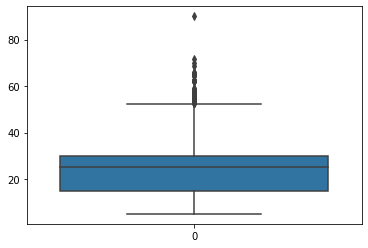

In [44]:
sns.boxplot(df_rice_kg['price'])
plt.show()

In [35]:
plot_box(df_rice['price'])

KeyError: 'price'

In [ ]:
df_rice['date']

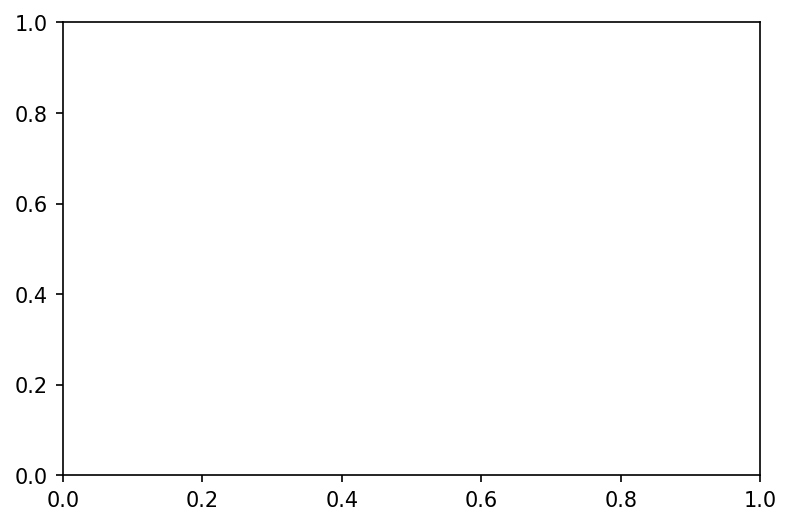

In [25]:
fig = plt.figure(dpi=150)
ax = fig.add_subplot(1, 1, 1)
plt.show()

In [48]:
df_rice_sliced = df_rice_kg[['date','price']]

In [50]:
grouped_rice = df_rice_sliced.groupby('date')['price'].mean()

In [54]:
grouped_rice = pd.DataFrame(grouped_rice)

In [56]:
grouped_rice.reset_index(inplace=True)

In [53]:
grouped_rice.reset_index(inplace=True)

TypeError: Cannot reset_index inplace on a Series to create a DataFrame

C:\Users\U6049975\AppData\Local\Temp\ipykernel_25376\731071604.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_rice_kg['date'], rotation=90)


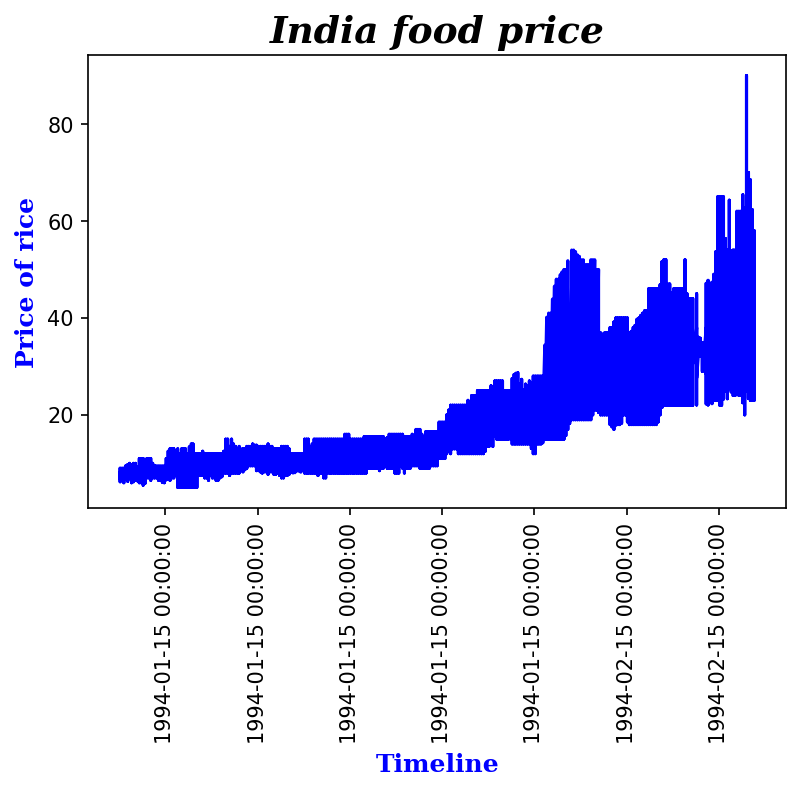

In [45]:
fig = plt.figure(dpi=150)
ax = fig.add_subplot(1, 1, 1)
# Plotting Line
#*******************************************************************
ax.plot(df_rice_kg['date'], df_rice_kg['price'], label='vals', color='blue')
#*******************************************************************
# Setting Tick Labels
ax.set_xticklabels(df_rice_kg['date'], rotation=90)
# Setting Label
ax.set_xlabel('Timeline', fontdict=xfont)
ax.set_ylabel('Price of rice', fontdict=yfont)
# Setting Title
ax.set_title('India food price', fontdict=title_font)
plt.show()

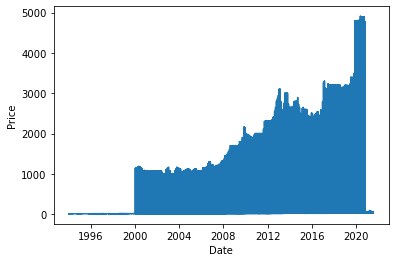

In [16]:
plt.plot(df_rice['price'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [6]:
df.groupby(['category']).mean()

,latitude,longitude,price,usdprice
category,,,,
cereals and tubers,22.372868,80.070036,121.847776,2.158932
milk and dairy,22.279295,79.666672,40.884617,0.619378
miscellaneous food,22.530546,80.258553,105.880733,1.662531
oil and fats,22.558814,80.017302,103.446653,1.569526
pulses and nuts,22.566959,80.143524,82.986586,1.215574
vegetables and fruits,22.523081,80.166482,27.546226,0.415845


In [7]:
df.groupby(['commodity']).mean()

,latitude,longitude,price,usdprice
commodity,,,,
Chickpeas,21.573447,78.837475,46.232946,0.826152
Ghee (vanaspati),22.446540,80.040387,91.489185,1.305307
Lentils,22.524909,80.055260,79.636643,1.161701
Lentils (masur),22.861855,80.425220,71.445899,1.066838
Lentils (moong),22.513792,80.190292,92.421080,1.326008
Lentils (urad),22.505812,80.125154,100.769388,1.450877
Milk,20.808718,77.552593,34.834601,0.575913
Milk (pasteurized),22.517578,80.009225,41.864925,0.626421
Oil (groundnut),22.521111,78.577400,137.537605,2.068645


In [4]:
df['admin1'].unique()

array(['Delhi', 'Gujarat', 'Himachal Pradesh', 'Karnataka',
       'Madhya Pradesh', 'Maharashtra', 'Orissa', 'Telangana', 'Tripura',
       'West Bengal', 'Meghalaya', 'Rajasthan', 'Tamil Nadu', 'Assam',
       'Kerala', 'Uttar Pradesh', 'Mizoram', 'Bihar', 'Chandigarh',
       'Jharkhand', 'Nagaland', 'Punjab', 'Uttarakhand', 'Andhra Pradesh',
       'Haryana', 'Andaman and Nicobar', 'Puducherry', 'Goa',
       'Chhattisgarh', 'Manipur', 'Sikkim'], dtype=object)

In [5]:
df['admin2'].unique()

array(['Delhi', 'Ahmadabad', 'Shimla', 'Bangalore Urban', 'Bhopal',
       'Mumbai city', 'Khordha', 'Hyderabad', 'West Tripura', 'Kolkata',
       'East Khasi Hills', 'Bikaner', 'Chennai', 'Kamrup',
       'Thiruvananthapuram', 'Lucknow', 'Aizawl', 'Patna', 'Chandigarh',
       'Ranchi', 'Amravati', 'Kohima', 'Amritsar', 'Ludhiana',
       'Dehra Dun', 'Krishna', 'Rajkot', 'Dindigul', 'Kanpur', 'Banka',
       'Hisar', 'Karnal', 'Mandi', 'Dharwad', 'Bid', 'Cuttack',
       'Sambalpur', 'Tiruchchirappalli', 'Agra', 'Varanasi', 'Darjiling',
       'Indore', 'Dimapur', 'Bathinda', 'Jodhpur', 'Ernakulam', 'Kota',
       'Andaman Islands', 'Puducherry', 'North Goa', 'Gurgaon',
       'Panchkula', 'Kozhikode', 'Gwalior', 'Jabalpur', 'Sundargarh',
       'Chittoor', 'Kurnool', 'Vishakhapatnam', 'Darbhanga', 'Gaya',
       'Muzaffarpur', 'Purnia', 'Bastar', 'Bilaspur', 'Durg', 'Surguja',
       'Kachchh', 'Surat', 'Kangra', 'Solan', 'Dakshin Kannad', 'Mysore',
       'Palakkad', 'Thrissur', '

In [4]:
df.shape

(132348, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132348 entries, 0 to 132347
Data columns (total 13 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   date       132348 non-null  object 
 1   admin1     132348 non-null  object 
 2   admin2     132348 non-null  object 
 3   market     132348 non-null  object 
 4   latitude   132348 non-null  float64
 5   longitude  132348 non-null  float64
 6   category   132348 non-null  object 
 7   commodity  132348 non-null  object 
 8   unit       132348 non-null  object 
 9   pricetype  132348 non-null  object 
 10  currency   132348 non-null  object 
 11  price      132348 non-null  float64
 12  usdprice   132348 non-null  float64
dtypes: float64(4), object(9)
memory usage: 13.1+ MB


In [7]:
df.describe()

,latitude,longitude,price,usdprice
count,132348.000000,132348.000000,132348.000000,132348.000000
mean,22.489590,80.094627,94.380368,1.513167
std,6.355006,5.770621,267.423173,4.594058
min,8.510000,69.700000,2.500000,0.060000
25%,18.860000,76.300000,24.000000,0.380000
50%,23.340000,78.000000,45.000000,0.690000
75%,26.840000,84.900000,93.000000,1.390000
max,32.220000,94.100000,4910.000000,88.780000


In [5]:
for col in df.columns:
    print(f'{col}--------{df[col].nunique()}')

date--------331
admin1--------31
admin2--------149
market--------155
latitude--------143
longitude--------117
category--------6
commodity--------23
unit--------3
pricetype--------1
currency--------1
price--------16174
usdprice--------2280


In [9]:
df['price'].max()

4910.0

In [8]:
df.loc[df['price'].max()]

date                    2002-12-15
admin1                  Tamil Nadu
admin2                     Chennai
market                     Chennai
latitude                    13.086
longitude                     80.3
category     vegetables and fruits
commodity                   Onions
unit                            KG
pricetype                   actual
currency                       INR
price                         7.25
usdprice                      0.15
Name: 4910, dtype: object

In [10]:
import plotly.express as px
px.set_mapbox_access_token(open(".mapbox_token").read())

fig = px.scatter_mapbox(df, lat="latitude", lon="longitude",     color="category", size="price",
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10)
fig.show()

FileNotFoundError: [Errno 2] No such file or directory: '.mapbox_token'

In [ ]:

india_map = gpd.read_file('path/to/India_shapefile.shp')

In [16]:
import geopandas as gpd

df_world = gpd.read_file('path/to/India_shapefile.shp')

print(f"{type(df_world)}, {df_world.geometry.name}")

print(df_world.head())

print(df_world.geometry.geom_type.value_counts())

DriverError: path/to/India_shapefile.shp: No such file or directory

In [15]:
import geopandas as gpd

df_world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

print(f"{type(df_world)}, {df_world.geometry.name}")

print(df_world.head())

print(df_world.geometry.geom_type.value_counts())

<class 'geopandas.geodataframe.GeoDataFrame'>, geometry
       pop_est      continent                      name iso_a3  gdp_md_est  \
0     889953.0        Oceania                      Fiji    FJI        5496   
1   58005463.0         Africa                  Tanzania    TZA       63177   
2     603253.0         Africa                 W. Sahara    ESH         907   
3   37589262.0  North America                    Canada    CAN     1736425   
4  328239523.0  North America  United States of America    USA    21433226   

                                            geometry  
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...  
Polygon         148
MultiPolygon     29
dtype: int64


In [12]:
conda install geopandas

^C

Note: you may need to restart the kernel to use updated packages.


In [14]:
!pip install geopandas

In [17]:
geometry = gpd.points_from_xy(df.longitude, df.latitude)
gdf = gpd.GeoDataFrame(df, geometry=geometry)

In [18]:
gdf

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,pricetype,currency,price,usdprice,geometry
0,1994-01-15,Delhi,Delhi,Delhi,28.67,77.20,cereals and tubers,Rice,KG,actual,INR,8.00,0.25,POINT (77.20000 28.67000)
1,1994-01-15,Delhi,Delhi,Delhi,28.67,77.20,cereals and tubers,Wheat,KG,actual,INR,5.00,0.16,POINT (77.20000 28.67000)
2,1994-01-15,Delhi,Delhi,Delhi,28.67,77.20,miscellaneous food,Sugar,KG,actual,INR,13.50,0.43,POINT (77.20000 28.67000)
3,1994-01-15,Delhi,Delhi,Delhi,28.67,77.20,oil and fats,Oil (mustard),KG,actual,INR,31.00,0.99,POINT (77.20000 28.67000)
4,1994-01-15,Gujarat,Ahmadabad,Ahmedabad,23.03,72.60,cereals and tubers,Rice,KG,actual,INR,6.80,0.22,POINT (72.60000 23.03000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132343,2021-07-15,West Bengal,West Midnapore,Kharagpur,22.34,87.25,pulses and nuts,Lentils (masur),KG,actual,INR,104.37,1.40,POINT (87.25000 22.34000)
132344,2021-07-15,West Bengal,West Midnapore,Kharagpur,22.34,87.25,pulses and nuts,Lentils (moong),KG,actual,INR,115.00,1.54,POINT (87.25000 22.34000)
132345,2021-07-15,West Bengal,West Midnapore,Kharagpur,22.34,87.25,pulses and nuts,Lentils (urad),KG,actual,INR,105.00,1.41,POINT (87.25000 22.34000)
132346,2021-07-15,West Bengal,West Midnapore,Kharagpur,22.34,87.25,vegetables and fruits,Onions,KG,actual,INR,30.00,0.40,POINT (87.25000 22.34000)


In [19]:
map_data = gpd.read_file('istockphoto-1353736230-612x612.jpg')

DriverError: 'istockphoto-1353736230-612x612.jpg' not recognized as a supported file format.